In [3]:
import numpy as np
import pandas as pd

In [41]:
results_df = pd.read_csv("res.csv")
results_df

,logfile,width,height,obstaclesN,hweight,found,length,nodescreated,numberofsteps,searchtime
0,../Tests/TestsData/City/tests_256/small_tasks/...,256,256,20,1,0,0,154,154,0.001903
1,../Tests/TestsData/City/tests_256/small_tasks/...,256,256,20,1,1,267,10142,8300,0.062949
2,../Tests/TestsData/City/tests_256/small_tasks/...,256,256,10,1,1,307,5098,4363,0.024754
3,../Tests/TestsData/City/tests_256/small_tasks/...,256,256,10,1,1,342,23338,21064,0.100767
4,../Tests/TestsData/City/tests_256/small_tasks/...,256,256,20,1,1,302,16305,13383,0.084799
...,...,...,...,...,...,...,...,...,...,...
3145,../Tests/TestsData/City/tests_1024/tasks_1000/...,1024,1024,1000,1,1,1057,242172,110951,24.803300
3146,../Tests/TestsData/City/tests_1024/tasks_1000/...,1024,1024,1000,1,1,1044,235679,99198,21.738700
3147,../Tests/TestsData/City/tests_1024/tasks_1000/...,1024,1024,1000,1,1,1120,367370,166800,21.707700
3148,../Tests/TestsData/City/tests_1024/tasks_1000/...,1024,1024,1000,1,1,1194,292514,128928,18.319000


In [42]:
results_df.groupby(['width', 'obstaclesN']).mean()

height  hweight     found       length   nodescreated  \
width obstaclesN                                                          
256   10           256.0      1.0  0.960000   291.546667   13609.160000   
      20           256.0      1.0  0.960000   297.720000   14922.986667   
      50           256.0      1.0  0.966667   295.086667   16403.460000   
      100          256.0      1.0  0.960000   291.666667   20460.880000   
      200          256.0      1.0  0.993333   303.880000   21906.426667   
      500          256.0      1.0  0.953333   295.453333   32385.993333   
      1000         256.0      1.0  0.940000   292.000000   31024.226667   
512   10           512.0      1.0  0.986667   605.300000   49677.286667   
      20           512.0      1.0  0.953333   575.660000   50160.506667   
      50           512.0      1.0  0.973333   601.893333   58901.006667   
      100          512.0      1.0  0.973333   593.273333   64324.180000   
      200          512.0      1.0  0.973333   586.080000   75166.620000   
      500          512.0      1.0  0.973333   584.166667   96653.380000   
      1000         512.0      1.0  0.986667   597.520000  112829.660000   
1024  10          1024.0      1.0  0.960000  1155.900000  196242.533333   
      20          1024.0      1.0  0.986667  1197.946667  201979.273333   
      50          1024.0      1.0  0.973333  1186.793333  225795.500000   
      100         1024.0      1.0  0.980000  1179.160000  227080.773333   
      200         1024.0      1.0  0.973333  1173.926667  261210.120000   
      500         1024.0      1.0  0.973333  1184.566667  348082.060000   
      1000        1024.0      1.0  0.973333  1147.573333  409281.513333   

                  numberofsteps  searchtime  
width obstaclesN                             
256   10           12201.933333    0.094155  
      20           12616.406667    0.123904  
      50           11817.173333    0.201629  
      100          13201.873333    0.371349  
      200          10654.180000    0.534289  
      500          16992.280000    1.323004  
      1000         14506.373333    2.324019  
512   10           46773.633333    0.324209  
      20           45791.333333    0.404664  
      50           48559.206667    0.713924  
      100          47476.080000    1.163793  
      200          46273.360000    1.985501  
      500          49654.600000    4.456100  
      1000         54799.386667    8.476120  
1024  10          190557.193333    1.453727  
      20          192017.966667    1.785435  
      50          204803.440000    3.073007  
      100         188052.660000    4.531332  
      200         193148.126667    7.966745  
      500         207283.760000   20.462348  
      1000        214470.446667   34.538808

In [43]:
results_df = results_df[results_df.found == 1]

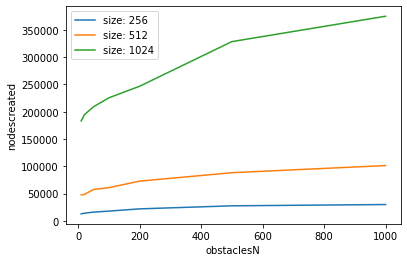

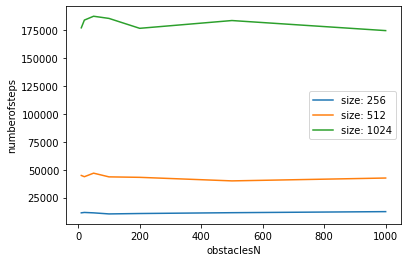

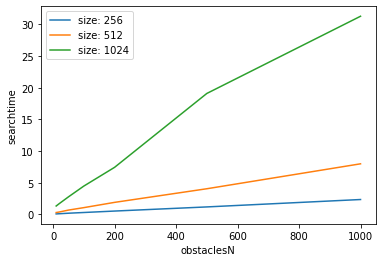

In [47]:
for trait in ['nodescreated', 'numberofsteps', 'searchtime']:
    df256 = results_df[results_df.width == 256].groupby(['obstaclesN']).mean()[trait]
    df512 = results_df[results_df.width == 512].groupby(['obstaclesN']).mean()[trait]
    df1024 = results_df[results_df.width == 1024].groupby(['obstaclesN']).mean()[trait]
    df = pd.concat([df256, df512, df1024], axis=1, keys=['size: 256', 'size: 512', 'size: 1024'])
    df.plot(kind='line', ylabel=trait, legend=True)


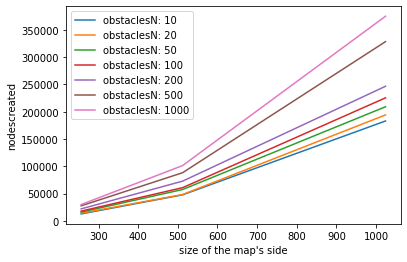

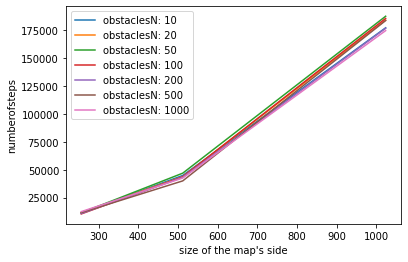

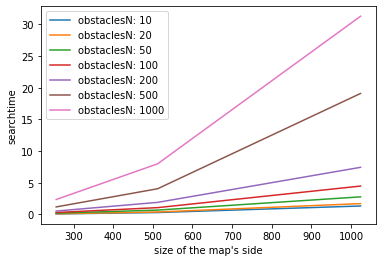

In [48]:
for trait in ['nodescreated', 'numberofsteps', 'searchtime']:
    dfs = []
    for obstaclesN in [10, 20, 50, 100, 200, 500, 1000]:
        dfs.append(results_df[results_df.obstaclesN == obstaclesN].groupby(['width']).mean()[trait])
    df = pd.concat(dfs, axis=1, keys=['obstaclesN: ' + str(n) for n in [10, 20, 50, 100, 200, 500, 1000]])
    df.plot(kind='line', xlabel='size of the map\'s side', ylabel=trait, legend=True)